In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [115]:
pd.set_option('display.max_columns', None)

In [116]:
travel_data = pd.read_csv("google_review_ratings.csv", index_col=0)
travel_data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [117]:
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 11  5456 non-null   object 
 11  Category 12  5455 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  C

In [118]:
travel_data.describe()   

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [119]:
travel_data['Unnamed: 25'].unique()

array([ nan, 1.04, 2.58])

In [120]:
travel_data.drop('Unnamed: 25', axis=1, inplace=True)
travel_data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [121]:
travel_data.isna().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    1
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    1
dtype: int64

In [122]:
travel_data['Category 24'].unique()

array([0.  , 0.51, 0.53, 0.54, 0.55, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.77, 0.8 , 0.88, 0.9 , 0.93, 0.85, 0.86, 0.89, 0.91, 0.96,
       0.95, 0.98, 1.  , 1.02, 1.04, 1.05, 1.07, 1.09, 1.11, 1.12, 1.14,
       1.16, 1.17, 1.19, 1.21, 1.23, 1.24, 1.25, 0.75, 5.  , 4.78, 4.77,
       0.76, 0.78, 0.79, 0.83, 0.94, 0.99, 1.03, 1.06, 1.22, 1.18, 1.2 ,
       1.28, 1.27, 1.29, 1.31, 1.33, 1.36, 1.37, 1.35, 1.34, 1.5 , 1.38,
       1.39, 1.4 , 1.42, 1.44, 1.48, 1.26, 1.3 , 1.41, 1.43, 1.46, 1.53,
       1.54, 1.56, 1.6 , 1.62, 1.64, 1.57, 1.58, 1.55, 1.65, 1.59, 1.69,
       1.82, 1.7 , 1.72, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87,
       1.89, 1.91, 1.93, 1.95, 1.92, 1.61, 1.71, 1.63, 2.25, 1.67, 1.68,
       2.32, 1.76, 2.35, 1.66, 4.3 , 0.92, 0.97, 1.08, 1.1 , 1.13, 1.15,
       0.82, 0.84, 0.87, 1.78, 1.32, 1.45, 1.47, 1.49, 1.51, 1.52, 1.74,
       1.8 , 1.84, 1.86, 1.88, 1.9 , 1.94, 2.  , 0.

In [123]:
travel_data.dropna(inplace=True)
travel_data.isna().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [124]:
travel_data.dtypes

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11     object
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
dtype: object

In [125]:
#entry repeated least number of times comes first
travel_data['Category 11'].unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [126]:
travel_data['Category 11']=travel_data['Category 11'].astype(float)

In [127]:
travel_data.dtypes

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11    float64
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
dtype: object

In [128]:
travel_data.columns=['churches', 'resorts', 'beaches', 'parks', 'theatres',
               'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars',
                'local_services', 'burger_pizza_shops', 'hotels_other_lodgings',
                'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools',
                'gyms', 'bakeries', 'beauty_spas', 'cafes', 'viewpoints', 
                'monuments', 'gardens']

In [129]:
travel_data.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,viewpoints,monuments,gardens
User,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


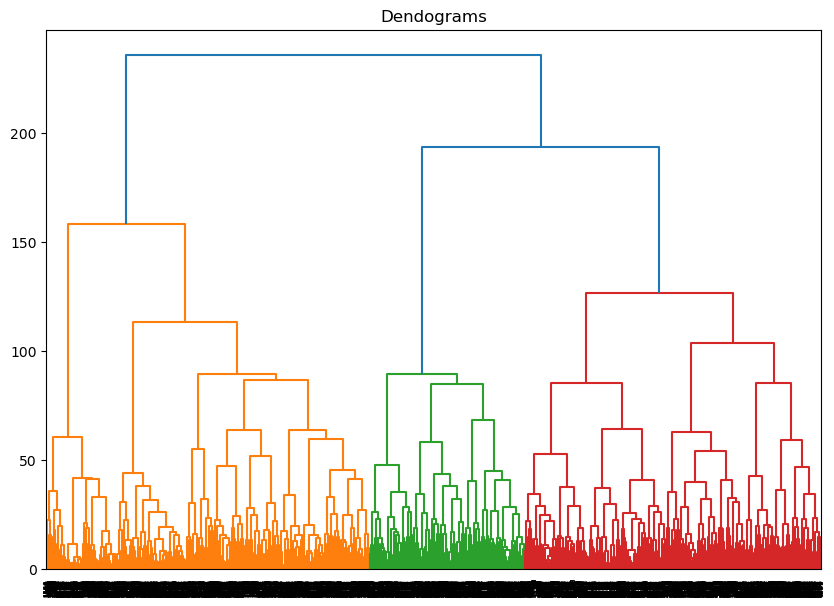

In [130]:
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(travel_data, method="ward"))

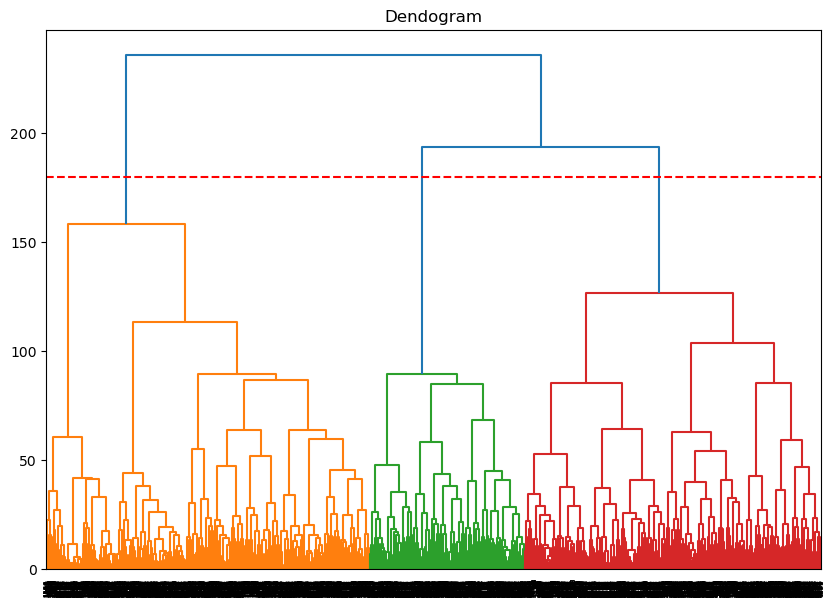

In [131]:
plt.figure(figsize=(10,7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(travel_data,method="ward"))
plt.axhline(y=180, color='r', linestyle='--')

In [132]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Y_pred = model.fit_predict(travel_data)

c:\Users\amalp\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [133]:
Y_pred

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [134]:
travel_data['Cluster'] = Y_pred
travel_data.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,viewpoints,monuments,gardens,Cluster
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1


In [135]:
travel_data['Cluster'].unique()

array([1, 0, 2], dtype=int64)

In [136]:
travel_data.Cluster.value_counts()

0    2278
1    2086
2    1090
Name: Cluster, dtype: int64

In [137]:
travel_data["Cluster"]=travel_data["Cluster"].map({0:'Negative',1:'Neutral',2:'Positive'})
travel_data.head(10)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,viewpoints,monuments,gardens,Cluster
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,2.64,1.73,1.68,1.69,1.71,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,2.64,1.70,1.68,1.69,1.71,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,2.63,1.71,1.67,1.68,1.70,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
